In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [226]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [227]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [228]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

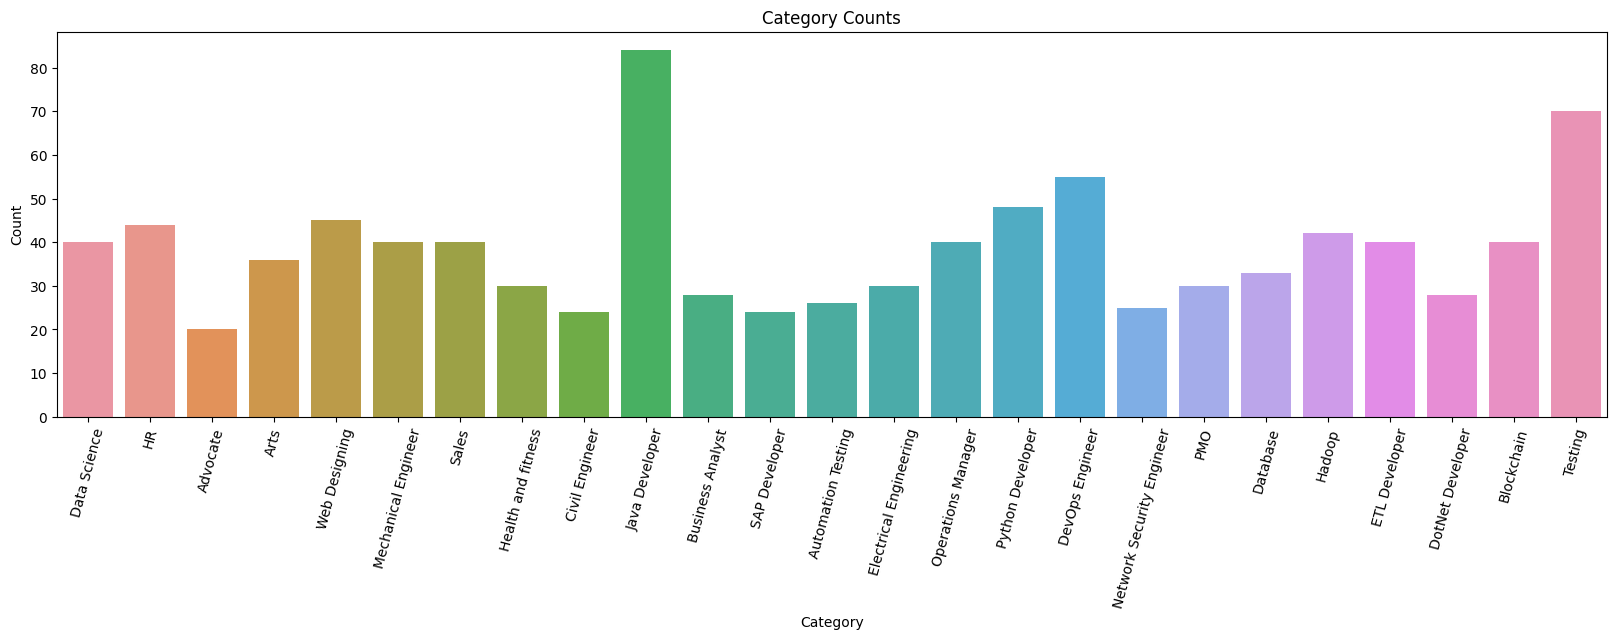

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
# Assuming df contains a 'Category' column
sns.countplot(data=df, x='Category')

# Customize the plot (optional)
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')

# Show the plot
plt.show()


In [230]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()

In [231]:
import numpy as np

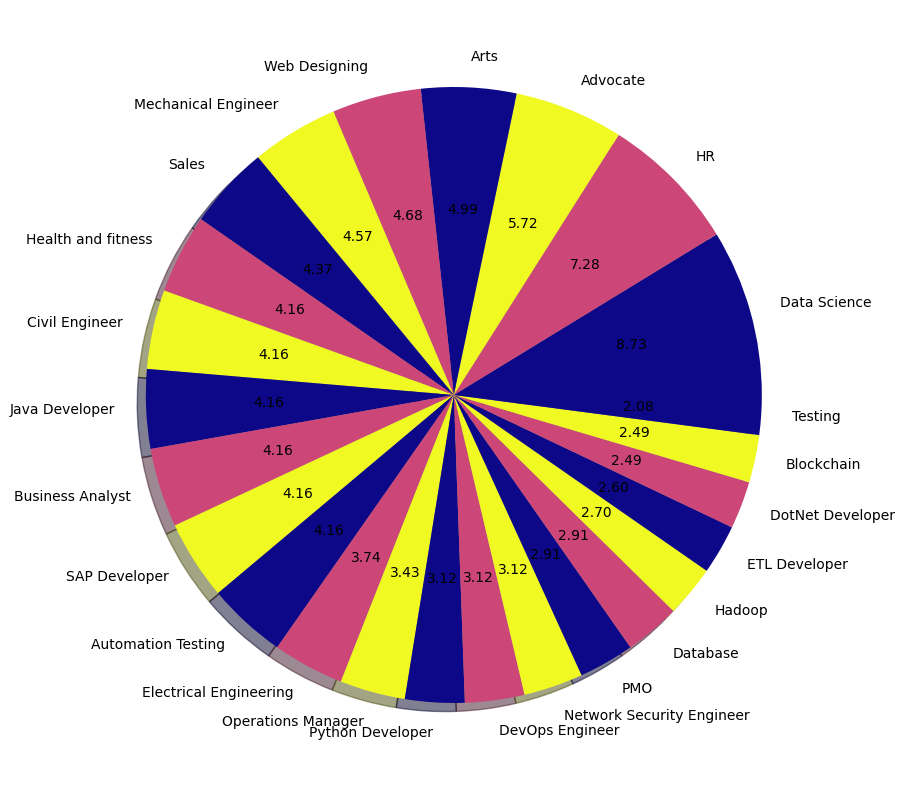

In [232]:
plt.figure(figsize=(10,10))
plt.pie(counts,labels=labels,autopct='%.2f',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [233]:
x=df['Resume'][0]


In [234]:
import re
import nltk


In [235]:
def preprocessing(text):
    text=re.sub('http\S+\s','',text )
    text=re.sub('[^a-zA-Z]', ' ',text )
    text=text.lower()
    return (text)


In [236]:
df['Resume']=df['Resume'].apply(lambda x: preprocessing(x))

In [237]:
df['Resume']

0      skills   programming languages  python  pandas...
1      education details   may      to may      b e  ...
2      areas of interest deep learning  control syste...
3      skills     r     python     sap hana     table...
4      education details    mca   ymcaust   faridabad...
                             ...                        
957    computer skills      proficient in ms office  ...
958        willingness to accept the challenges      ...
959    personal skills     quick learner      eagerne...
960    computer skills   software knowledge ms power ...
961    skill set os windows xp            database my...
Name: Resume, Length: 962, dtype: object

In [238]:
df

,Category,Resume
0,Data Science,skills programming languages python pandas...
1,Data Science,education details may to may b e ...
2,Data Science,areas of interest deep learning control syste...
3,Data Science,skills r python sap hana table...
4,Data Science,education details mca ymcaust faridabad...
...,...,...
957,Testing,computer skills proficient in ms office ...
958,Testing,willingness to accept the challenges ...
959,Testing,personal skills quick learner eagerne...
960,Testing,computer skills software knowledge ms power ...


In [239]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [240]:
lr.fit(df['Category'])
df['Category']=lr.transform(df['Category'])

In [241]:
df

,Category,Resume
0,6,skills programming languages python pandas...
1,6,education details may to may b e ...
2,6,areas of interest deep learning control syste...
3,6,skills r python sap hana table...
4,6,education details mca ymcaust faridabad...
...,...,...
957,23,computer skills proficient in ms office ...
958,23,willingness to accept the challenges ...
959,23,personal skills quick learner eagerne...
960,23,computer skills software knowledge ms power ...


In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
x=tfidf.transform(df['Resume'])

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, df['Category'], test_size=0.33, random_state=42)


In [244]:
X_train.shape

(644, 7036)

In [245]:
y_train.shape

(644,)

In [246]:
from keras import Sequential
from keras.layers import Dense,Flatten

In [247]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
model=OneVsRestClassifier(KNeighborsClassifier())

In [248]:
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [249]:
y_pred=model.predict(X_test)

In [250]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23,  2,  3, 18, 14,  1, 12, 13, 22, 12, 11, 23,
       18, 15, 19, 15,  6,  0, 15,  8,  9, 16,  6, 12, 14,  9, 15,  4,  0,
       20, 16,  7,  8, 23

In [251]:
from sklearn.metrics import accuracy_score,confusion_matrix
model.score(X_test,y_test)

0.9874213836477987

In [252]:
accuracy_score(y_test,y_pred)

0.9874213836477987

<Axes: >

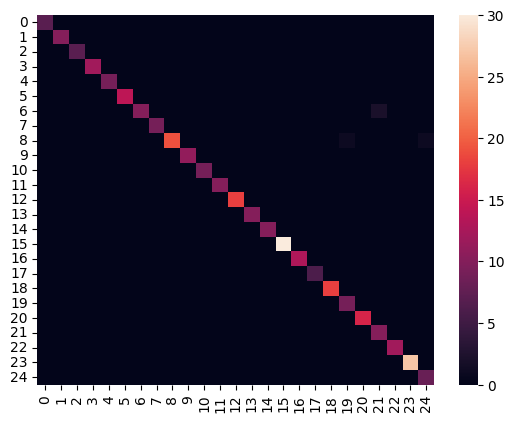

In [253]:
sns.heatmap(confusion_matrix(y_test,y_pred) )

In [254]:
import pickle

pickle.dump(model,open('Model.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [255]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])